<a href="https://colab.research.google.com/github/girisiman/Deep_Learning_Tasks/blob/master/MLP_DAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras.datasets.mnist as mnist
import keras
from keras import regularizers
from keras.layers import Input
from keras.models import Model
from keras.layers import Layer
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import  KerasClassifier
import os
from sklearn.metrics import accuracy_score


Using TensorFlow backend.


Building all the function required to build a model, predict and table the required result

In [0]:
# function to build basic mlp:
def create_model(layers,activation, optimizer,drop_out, num_classes=10):
  ''' Build a simple mlp model for multi-class classification;  
      Arguments:all the hyperparametes (layers,act,opt, drop_out) to buld in a mlp provided by dictionary of parameters used during hyperparameter
      optimization
           '''
  model = Sequential()
  for i in range(len(layers)):
    if i == 0:
        model.add(Dense(layers[i], activation=activation, input_shape=(784,)))
        model.add(Dropout(drop_out))
    else:
      model.add(Dense(layers[i], activation=activation))
      model.add(Dropout(drop_out))
  model.add(Dense(num_classes, activation=activation))
  model.summary()

  model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

  return model

In [0]:
def search_besthyperparameter(model,parameter,x_train,y_train):
  ''' Function to search for best parameter using GridSearch CV
  #Argument:Kerasclassifiedmodel and dictionary of parameter
  #output Classifier after perforfing gridsearchCV and results of all the parameters
  #best_estimator: Estimators(with the combination of hyperparameter) providing best score
  ###Thus function trains the model and provide the result.'''
  classifier = GridSearchCV(estimator=model, param_grid=parameter, scoring ='accuracy')
  search_result = classifier.fit(x_train, y_train)
  print("Best Accuracy: %f using %s" % (search_result.best_score_, search_result.best_params_))
  best_estimator = classifier.best_estimator_
  return search_result, best_estimator

In [0]:
def table_search_result(grid_result):
  ''' Function to plot the top5 best parameter combination based on the gridsearchcv score
  #Argument:results from the training
  #output: table with top5 best parameter'''
  import pandas as pd
  means = grid_result.cv_results_['mean_test_score']
  #stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  rank = grid_result.cv_results_['rank_test_score']
  d = {'rank_param':rank,'means_test_score':means,  'params':params}
  result_table = pd.DataFrame(data =d)
  #display(result_table.head())
  sc = result_table.sort_values(by='rank_param',ascending = True)
  display(sc.head(10))
  
  

In [0]:
def predict_classifier(best_estimator,x_test,y_test):
  ''' Predict the accuracy of the classifier, using best found estimator
  #best_estimator: best found estimator
  #x_test,y_test: test datasets to predict'''
  #output_accuracy 
  #best_estimator = classifier.best_estimator_
  y_predicted = best_estimator.predict(x_test)
  #print(y_predicted)
  accuracy = (accuracy_score(y_test,y_predicted)*100)
  #print('Accuracy: ',accuracy*100)
  return accuracy

In [0]:
def load_data(num_classes = 10):
  ''' funtion that load original mnist dataset, seperated into train and test set
  #returns x_train,x_test,y_train,y_test'''
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = x_train.reshape(60000, 784)
  x_test = x_test.reshape(10000, 784)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')
  return x_train, x_test, y_train, y_test

In [0]:
def add_noise(x_train, x_test):
  ''' Adds randomly generated gaussian noise to the train and test set
  # argument, x_train, x_test of original data
  #output: x_train and test with the nosise'''
  noise_factor = 0.2
  x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
  x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
  x_train_noisy = np.clip(x_train_noisy, 0., 1.)
  x_test_noisy = np.clip(x_test_noisy, 0., 1.)
  return x_train_noisy, x_test_noisy

performing the classification with hyperparameter searching in the original data.

In [0]:
# loading the dataset:
x_train, x_test, y_train, y_test = load_data()

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


In [0]:
model = KerasClassifier(build_fn=create_model, epochs=25, batch_size=128, verbose=0)
parameter = {'layers':[[512,512],[512,512,512]],'activation': [ 'elu',  'relu',],
             'optimizer': [ 'Adam' ],
             'drop_out': [ 0.5]}

In [0]:
search_result,best_estimator = search_besthyperparameter(model,parameter,x_train,y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)          

In [0]:
table_search_result(search_result)

,rank_param,means_test_score,params
3,1,0.959500,"{'activation': 'relu', 'drop_out': 0.5, 'layer..."
2,2,0.953167,"{'activation': 'relu', 'drop_out': 0.5, 'layer..."
1,3,0.925917,"{'activation': 'elu', 'drop_out': 0.5, 'layers..."
0,4,0.903233,"{'activation': 'elu', 'drop_out': 0.5, 'layers..."


In [0]:
Result={'Accuracy_original':[],'Accuracy_noise':[],'Accuracy_recon':[]}
Accuracy_original = predict_classifier(best_estimator,x_test,y_test)
Result.update(Accuracy_original = Accuracy_original)
Result

[7 2 1 ... 4 5 6]
Accuracy:  9683.0


{'Accuracy_noise': [], 'Accuracy_original': 96.83, 'Accuracy_recon': []}

In [0]:
# loading the dataset with noise:
x_train_noise, x_test_noise = add_noise(x_train,x_test)

In [42]:
# training and hyperparameter searaching with model and parameter
search_result_noise,best_estimator_noise = search_besthyperparameter(model,parameter,x_train_noise,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_234 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_163 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_235 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_164 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_236 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dens

In [43]:
table_search_result(search_result)

,rank_param,means_test_score,params
3,1,0.959500,"{'activation': 'relu', 'drop_out': 0.5, 'layer..."
2,2,0.953167,"{'activation': 'relu', 'drop_out': 0.5, 'layer..."
1,3,0.925917,"{'activation': 'elu', 'drop_out': 0.5, 'layers..."
0,4,0.903233,"{'activation': 'elu', 'drop_out': 0.5, 'layers..."


In [44]:
Accuracy_noise = predict_classifier(best_estimator_noise,x_test_noise,y_test)
Result.update(Accuracy_noise = Accuracy_noise)
Result

{'Accuracy_noise': 93.54, 'Accuracy_original': 96.83, 'Accuracy_recon': 89.37}

Building Simple AutoEncoder for Denoising purpose

In [0]:
#Adding Noise to the Data
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [0]:
from sklearn.model_selection import train_test_split
x_noisy_train, x_val,y_noisy_train,y_val = train_test_split(x_train_noisy, y_train, test_size=0.33, random_state=42)

In [33]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_noisy_train, x_noisy_train,epochs=100,
                batch_size=256,
                shuffle=True,validation_data=(x_val,x_val))

Train on 40200 samples, validate on 19800 samples
Epoch 1/100
40200/40200 [==============================] - 5s 136us/step - loss: 0.5074 - val_loss: 0.4347
Epoch 2/100
40200/40200 [==============================] - 1s 27us/step - loss: 0.4332 - val_loss: 0.4314
Epoch 3/100
40200/40200 [==============================] - 1s 28us/step - loss: 0.4296 - val_loss: 0.4274
Epoch 4/100
40200/40200 [==============================] - 1s 27us/step - loss: 0.4248 - val_loss: 0.4216
Epoch 5/100
40200/40200 [==============================] - 1s 27us/step - loss: 0.4184 - val_loss: 0.4148
Epoch 6/100
40200/40200 [==============================] - 1s 28us/step - loss: 0.4116 - val_loss: 0.4081
Epoch 7/100
40200/40200 [==============================] - 1s 27us/step - loss: 0.4053 - val_loss: 0.4023
Epoch 8/100
40200/40200 [==============================] - 1s 28us/step - loss: 0.4000 - val_loss: 0.3975
Epoch 9/100
40200/40200 [==============================] - 1s 27us/step - loss: 0.3956 - val_loss: 0.

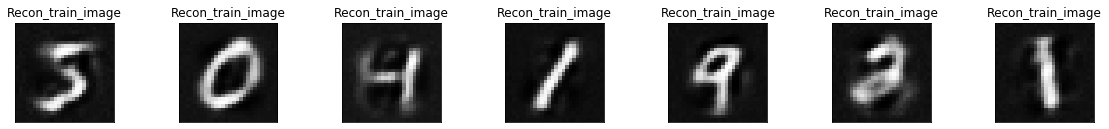

In [34]:
pred_image_enco = encoder.predict(x_train_noisy)
recon_image_train = decoder.predict(pred_image_enco)
n = 7  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1 +n)
  plt.imshow(recon_image_train[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.title('Recon_train_image')
plt.show()

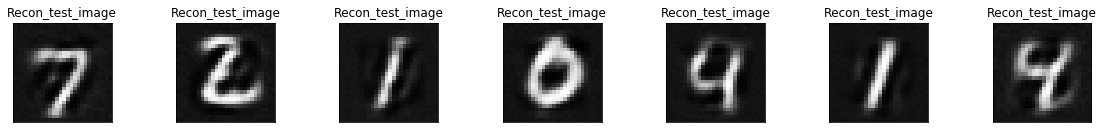

In [35]:
pred_image_enco = encoder.predict(x_test_noisy)
recon_image_test = decoder.predict(pred_image_enco)
n = 7  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1 +n)
  plt.imshow(recon_image_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.title('Recon_test_image')
plt.show()

In [38]:
search_result_noise,best_estimator_recon = search_besthyperparameter(model,parameter,recon_image_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_130 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_189 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_131 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_190 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dens

In [45]:
Accuracy_recon = predict_classifier(best_estimator_recon,recon_image_test,y_test)
Result.update(Accuracy_recon = Accuracy_recon)
Result

{'Accuracy_noise': 93.54, 'Accuracy_original': 96.83, 'Accuracy_recon': 89.37}

In [51]:
import pandas as pd

final_result = pd.DataFrame(data=Result, index = [1])
display(final_result)

,Accuracy_original,Accuracy_noise,Accuracy_recon
1,96.83,93.54,89.37


To prevent it from learning the identity and help  learned more robust features of data, we use validation set.

> Indented block

